In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [44]:
#load continent csv data in dataframe 
pull_happy = "../Data/World Happiness 2016.csv"
pull_region = "../Data/Country Region.csv"

happy = pd.read_csv(pull_happy)
Region = pd.read_csv(pull_region)
Region.head()

,Country,Region,Continent
0,Anguilla,Caribbean,North America
1,Antigua and Barbuda,Caribbean,North America
2,Aruba,Caribbean,North America
3,Bahamas,Caribbean,North America
4,Barbados,Caribbean,North America


In [45]:
#before merge some country names need to be replaced to match the names in the Happiness data
C_rename4 = {"Bolivia (Plurinational State of)":"Bolivia","Iran (Islamic Republic of)":"Iran","Cote d'Ivoire":"Ivory Coast",
"China, Hong Kong SAR":"Hong Kong","Lao People's Democratic Republic":"Laos","Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"Macedonia","Russian Federation":"Russia",
"Republic of Korea":"South Korea","Republic of Moldova":"Moldova","United Kingdom of Great Britain":"United Kingdom",
"United Republic of Tanzania":"Tanzania","United States of America":"United States","Viet Nam":"Vietnam",
"Venezuela (Bolivarian Republic of)":"Venezuela"}
Region2 = Region.replace(C_rename4)
happy_region = pd.merge(happy, Region2, how = "left")
happy_region.count()
output_data_file = "Happy_Region.csv"
happy_region.to_csv(output_data_file, index=False)


Text(0.5, 1.0, 'Happiness Score Distribution')

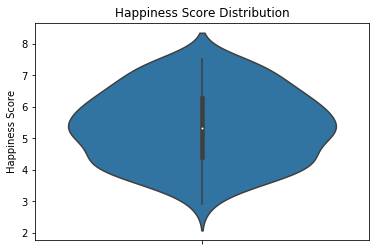

In [46]:
#Look at the overall shape of the data
ax = sns.violinplot(y=happy["Happiness Score"])
ax.set_title("Happiness Score Distribution")

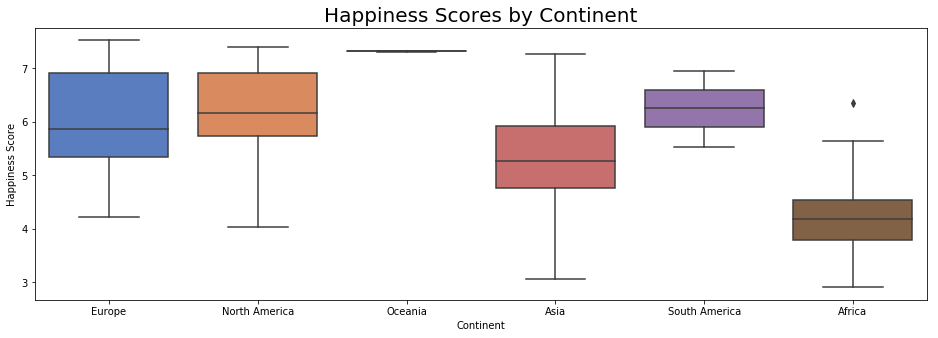

In [91]:
#All continents next to each other
#happy_region_test = happy_region[[happy_region["Continent"]] == ["Europe","North America"]]
fig_cont, ax_cont = plt.subplots(figsize = (16,5))
#ax_cont = sns.violinplot(x = "Continent",y = "Happiness Score", data = happy_region,palette="muted")
#plt.tight_fit()
ax_cont = sns.boxplot(x = "Continent",y = "Happiness Score", data = happy_region,palette="muted")
plt.title("Happiness Scores by Continent", fontsize = 20)
fig_cont.savefig("../ChartsTables/HappyContBox.png")

## Look at Distribution of Regions within Continents

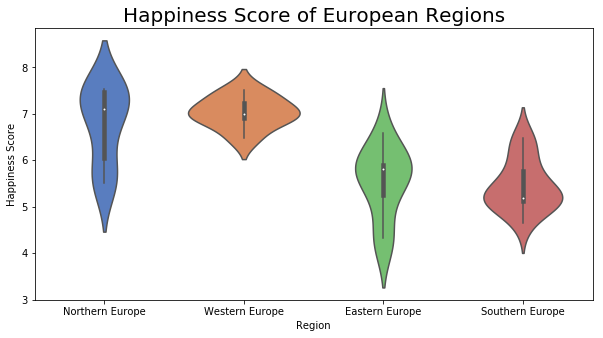

In [72]:
happy_eu = happy_region[happy_region["Continent"] == "Europe"]
fig_eu, ax_eu = plt.subplots(figsize = (10,5))
ax_eu = sns.violinplot(x = "Region",y = "Happiness Score", data = happy_eu,palette="muted")
ax_eu.set_title("Happiness Score of European Regions", fontsize = 20)
fig_eu.savefig("../ChartsTables/EuropeanRegions.png")

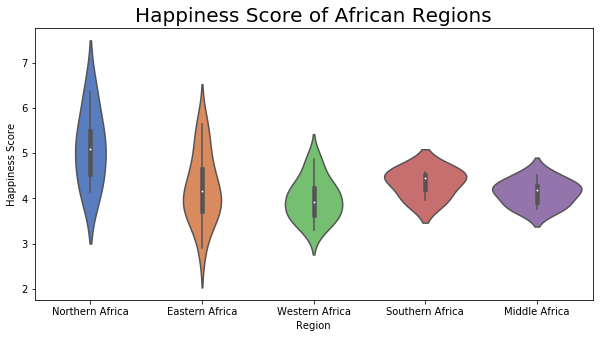

In [68]:
happy_africa = happy_region[happy_region["Continent"] == "Africa"]
fig_africa, ax_africa = plt.subplots(figsize = (10,5))
ax_africa = sns.violinplot(x = "Region",y = "Happiness Score", data = happy_africa,palette="muted")
ax_africa.set_title("Happiness Score of African Regions", fontsize = 20)
fig_africa.savefig("../ChartsTables/AfricanRegions.png")

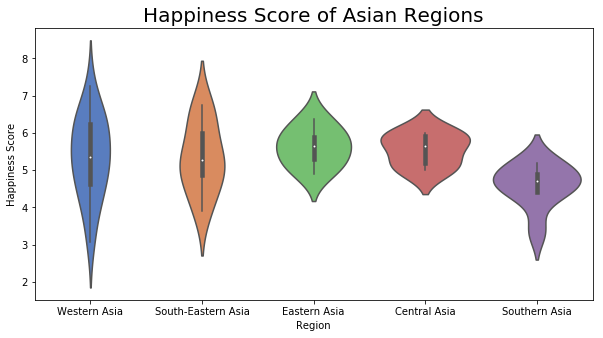

In [69]:
happy_asia = happy_region[happy_region["Continent"] == "Asia"]
fig_asia, ax_asia = plt.subplots(figsize = (10,5))
ax_asia = sns.violinplot(x = "Region",y = "Happiness Score", data = happy_asia,palette="muted")
ax_asia.set_title("Happiness Score of Asian Regions", fontsize = 20)
fig_asia.savefig("../ChartsTables/asianRegions.png")

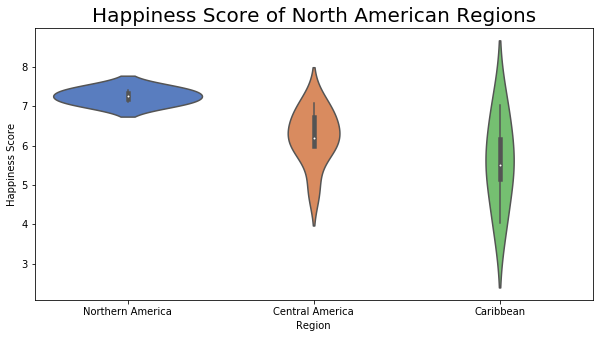

In [70]:
happy_NA = happy_region[happy_region["Continent"] == "North America"]
fig_NA, ax_NA = plt.subplots(figsize = (10,5))
ax_NA = sns.violinplot(x = "Region",y = "Happiness Score", data = happy_NA,palette="muted")
ax_NA.set_title("Happiness Score of North American Regions", fontsize = 20)
fig_NA.savefig("../ChartsTables/NARegions.png")

In [63]:
#separate the data by continent and run an ANOVA to see if happiess scores differ  
happy_SA = happy_region[happy_region["Continent"]=="South America"]
happy_oceania = happy_region[happy_region["Continent"]=="Oceania"]

stats.f_oneway(happy_asia["Happiness Score"],happy_africa["Happiness Score"],
               happy_eu["Happiness Score"],happy_NA["Happiness Score"],
               happy_SA["Happiness Score"],happy_oceania["Happiness Score"])

F_onewayResult(statistic=27.859379157984637, pvalue=6.353019504109328e-20)

In [73]:
#The F test indicates that the Happiness scores of different continents are different. 
#Now, we run a t-test for all pairwise comparisons of continents to see which continents have significantly different scores. 

#initialize list variables to store comparison values
continents = ["Asia","Africa", "Europe", "North America","South America","Oceania"]
cont1 = []
cont2 = []
tstat = []
pval = []

#loop through the continents, comparing them to every other continent to run a t-test
for i, c1 in enumerate(continents):
    for j, c2 in enumerate(continents):
        if j > i:
            cont1.append(c1)
            cont2.append(c2)
            hrs_cont1 = happy_region[happy_region["Continent"]==c1]
            hrs_cont2 = happy_region[happy_region["Continent"]==c2]
            stat,p =stats.ttest_ind(hrs_cont1["Happiness Score"],hrs_cont2["Happiness Score"], equal_var=False)
            tstat.append(stat)
            pval.append(p)
            #print(f'{c1} vs {c2}: Test statistic {stat}, P-Value {p}')
continent_ttest = pd.DataFrame({"Continent1":cont1, "Continent2": cont2, "T-stat": tstat, "P-Value": pval})

#export to CSV to make a pretty table for presentation
output_data_file = "../ChartsTables/Continent_Ttest.csv"
continent_ttest.to_csv(output_data_file, index=False)
continent_ttest

,Continent1,Continent2,T-stat,P-Value
0,Asia,Africa,5.915870,6.982500e-08
1,Asia,Europe,-4.035394,1.228587e-04
2,Asia,North America,-3.147208,4.529001e-03
3,Asia,South America,-5.144241,1.354811e-05
4,Asia,Oceania,-15.412267,1.123141e-19
5,Africa,Europe,-9.890327,5.691729e-15
6,Africa,North America,-7.060103,9.020138e-07
7,Africa,South America,-11.506333,4.376831e-11
8,Africa,Oceania,-29.023303,1.001281e-29
9,Europe,North America,-0.230843,8.192955e-01
